In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
import warnings
import os
import scipy.cluster.hierarchy as sch
import category_encoders as ce

## Eksplorasi Data

In [32]:
df = pd.read_csv(r'../data/income_evaluation.csv')
df.head()
# drop income column 
df.drop(df.columns[[14]], axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [33]:
# filter from 24000 to 28000 rows
df_filter = df[24000:28000]
df_filter.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
24000,19,Private,294029,11th,7,Never-married,Sales,Own-child,Other,Female,0,0,32,Nicaragua
24001,23,Private,112819,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
24002,41,Private,152636,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Female,0,0,50,United-States
24003,63,?,301611,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,20,United-States
24004,51,Private,134808,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Female,0,0,40,United-States


In [34]:
df.shape

(32561, 14)

In [35]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [37]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')

## Jumlah Missing Value

In [38]:
(df.isnull().sum() / df.shape[0] * 100.00)

age                0.0
 workclass         0.0
 fnlwgt            0.0
 education         0.0
 education-num     0.0
 marital-status    0.0
 occupation        0.0
 relationship      0.0
 race              0.0
 sex               0.0
 capital-gain      0.0
 capital-loss      0.0
 hours-per-week    0.0
 native-country    0.0
dtype: float64

## Visualisasi Data

In [39]:
plt.style.use('fivethirtyeight')

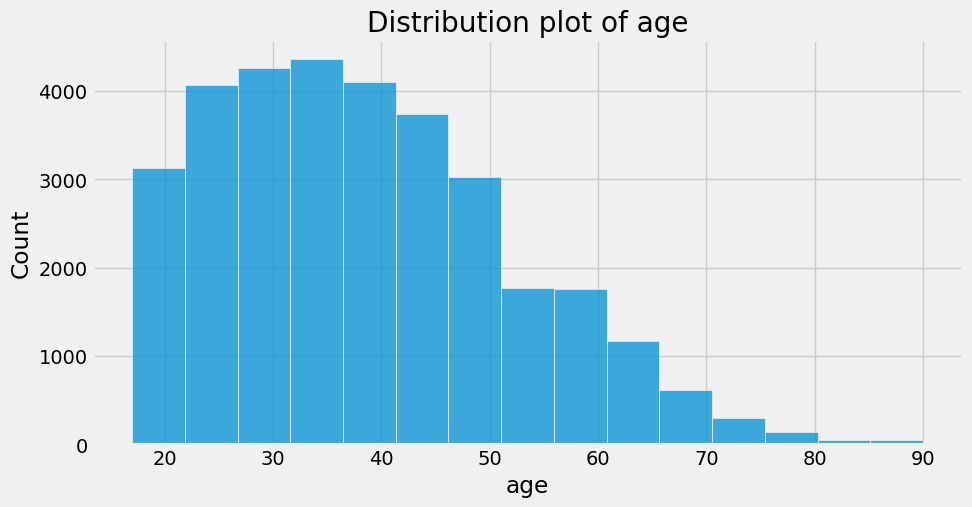

In [40]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(df['age'] , bins = 15)
g.bar_label(g.containers[0])
plt.title('Distribution plot of age')
plt.show()

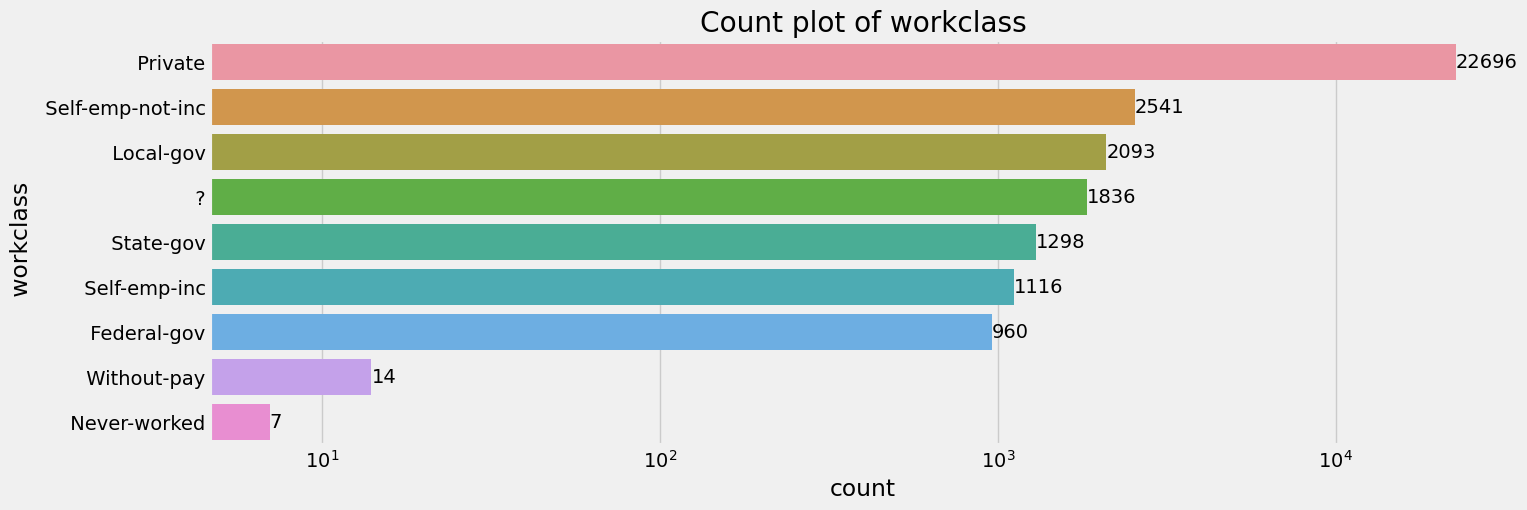

In [41]:
plt.figure(1 , figsize = (15 , 5))
g = sns.countplot(y = ' workclass' , data = df, order=df[' workclass'].value_counts().index)
g.bar_label(g.containers[0])
g.set_xscale('log')
plt.title('Count plot of workclass')
plt.show()

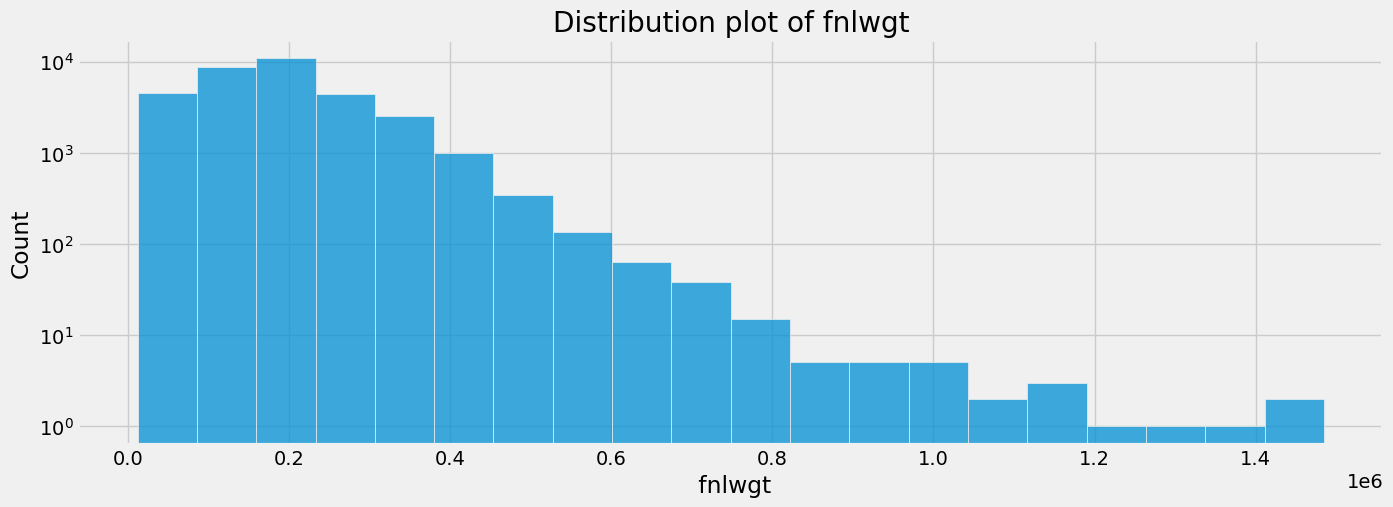

In [42]:
plt.figure(1 , figsize = (15 , 5))
g = sns.histplot(df[' fnlwgt'] , bins = 20)
g.bar_label(g.containers[0])
g.set_yscale('log')
plt.title('Distribution plot of fnlwgt')
plt.show()

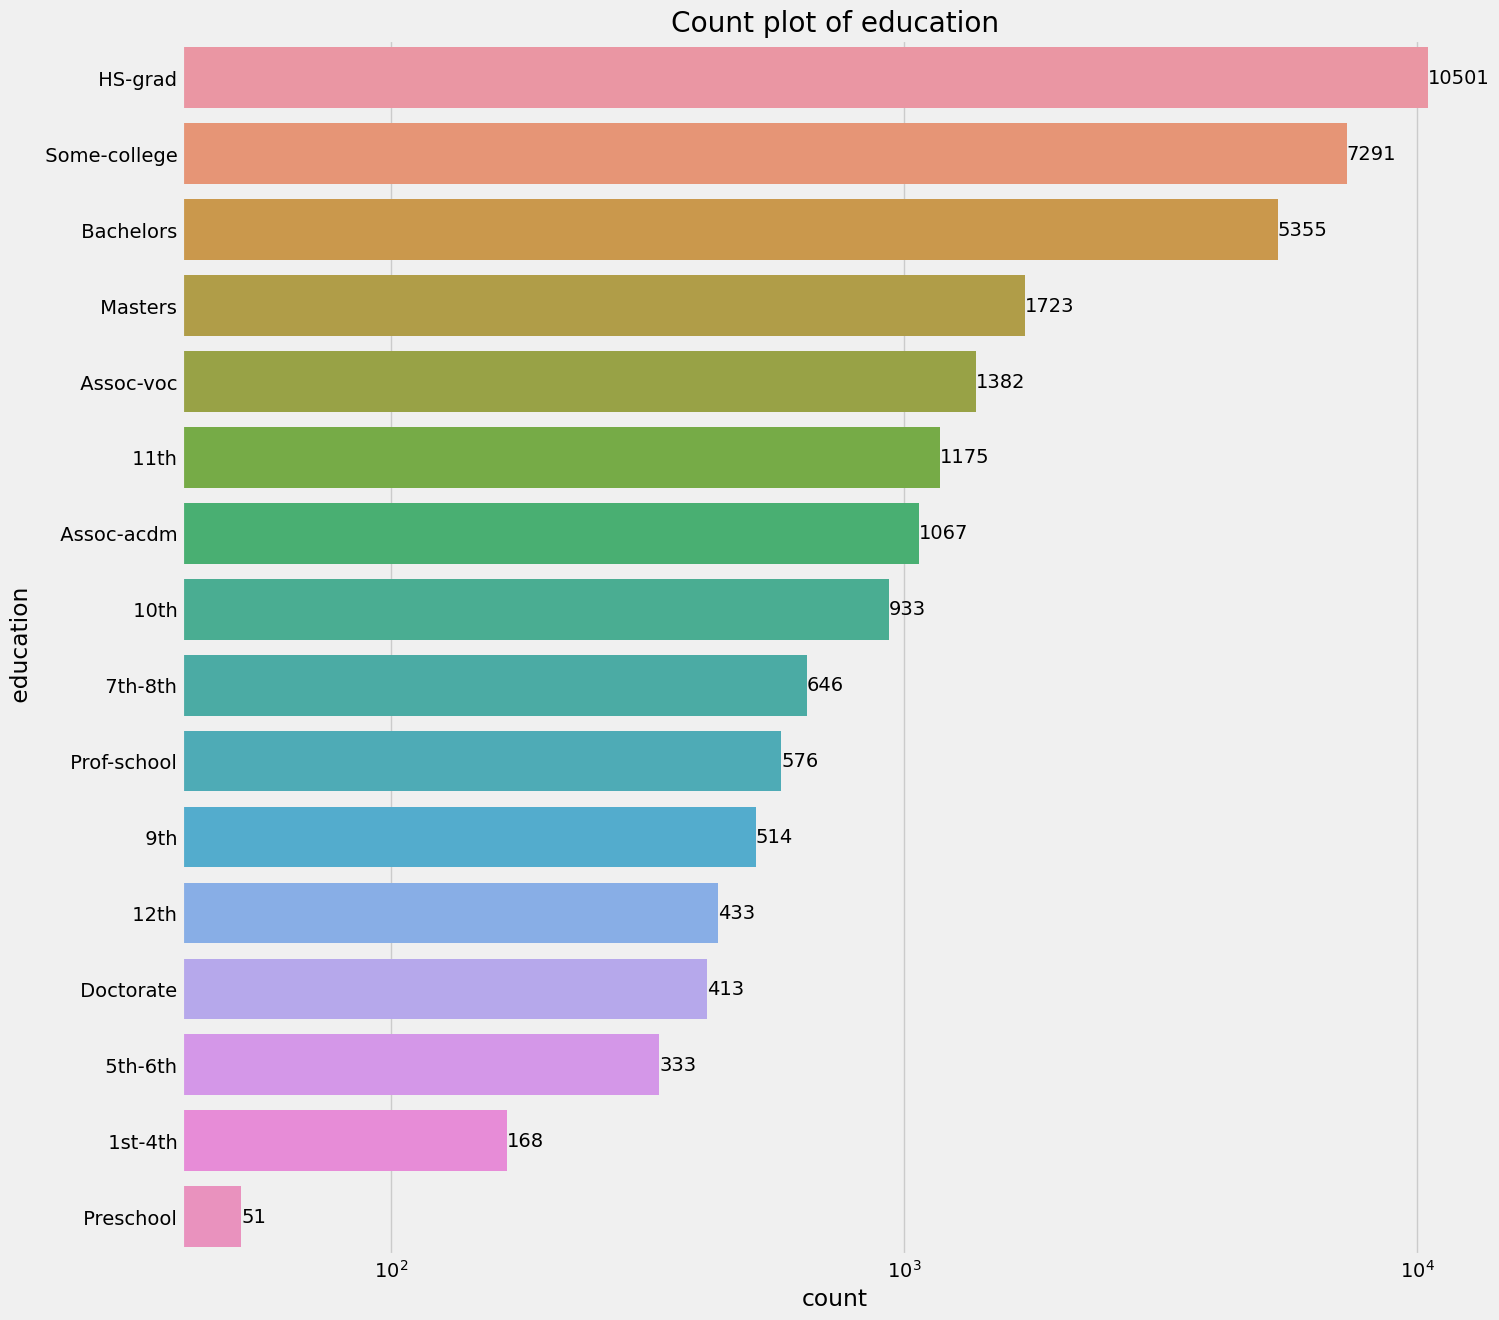

In [43]:
plt.figure(1 , figsize = (15 , 15))
g = sns.countplot(y = ' education' , data = df, order=df[' education'].value_counts().index)
g.bar_label(g.containers[0])
g.set_xscale('log')
plt.title('Count plot of education')
plt.show()

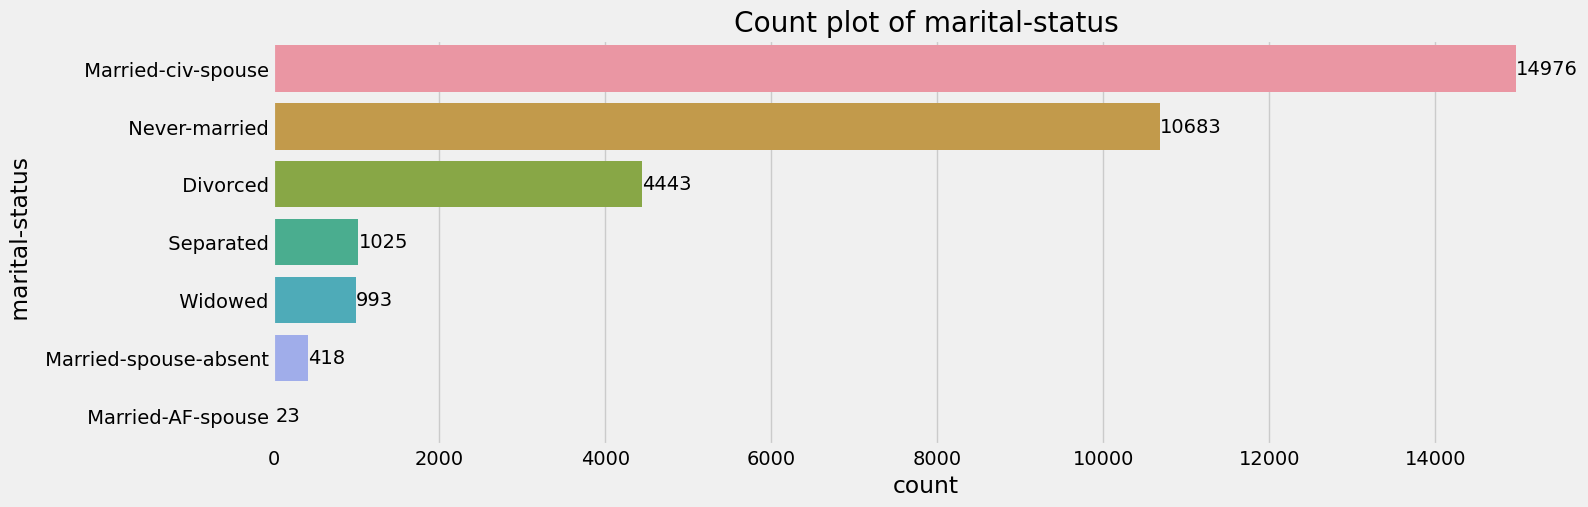

In [46]:
plt.figure(1 , figsize = (15 , 5))
g = sns.countplot(y = ' marital-status' , data = df, order=df[' marital-status'].value_counts().index)
g.bar_label(g.containers[0])
plt.title('Count plot of marital-status')
plt.show()

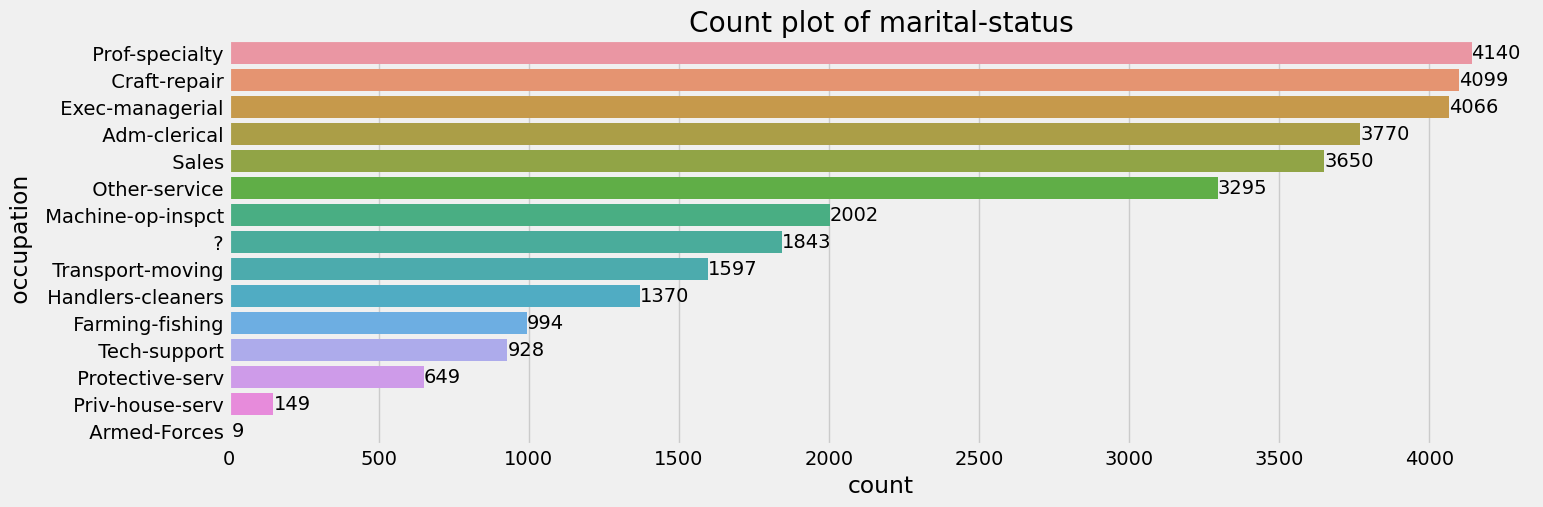

In [47]:
plt.figure(1 , figsize = (15 , 5))
g = sns.countplot(y = ' occupation' , data = df, order=df[' occupation'].value_counts().index)
g.bar_label(g.containers[0])
plt.title('Count plot of marital-status')
plt.show()

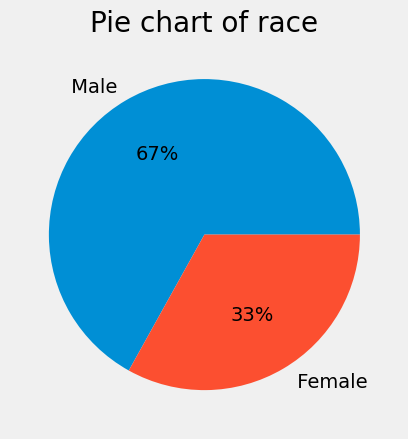

In [48]:
plt.pie(df[' sex'].value_counts(), labels=df[' sex'].unique(), autopct='%.0f%%')
plt.title('Pie chart of race')
plt.show()

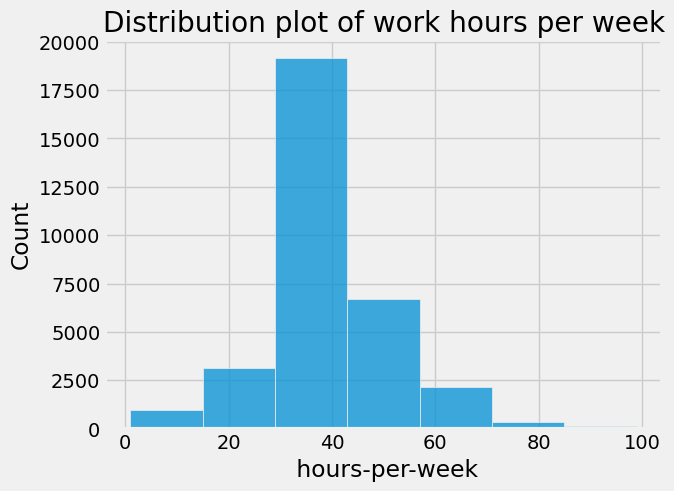

In [49]:
g = sns.histplot(df[' hours-per-week'] , bins = 7)
g.bar_label(g.containers[0])
plt.title('Distribution plot of work hours per week')
plt.show()

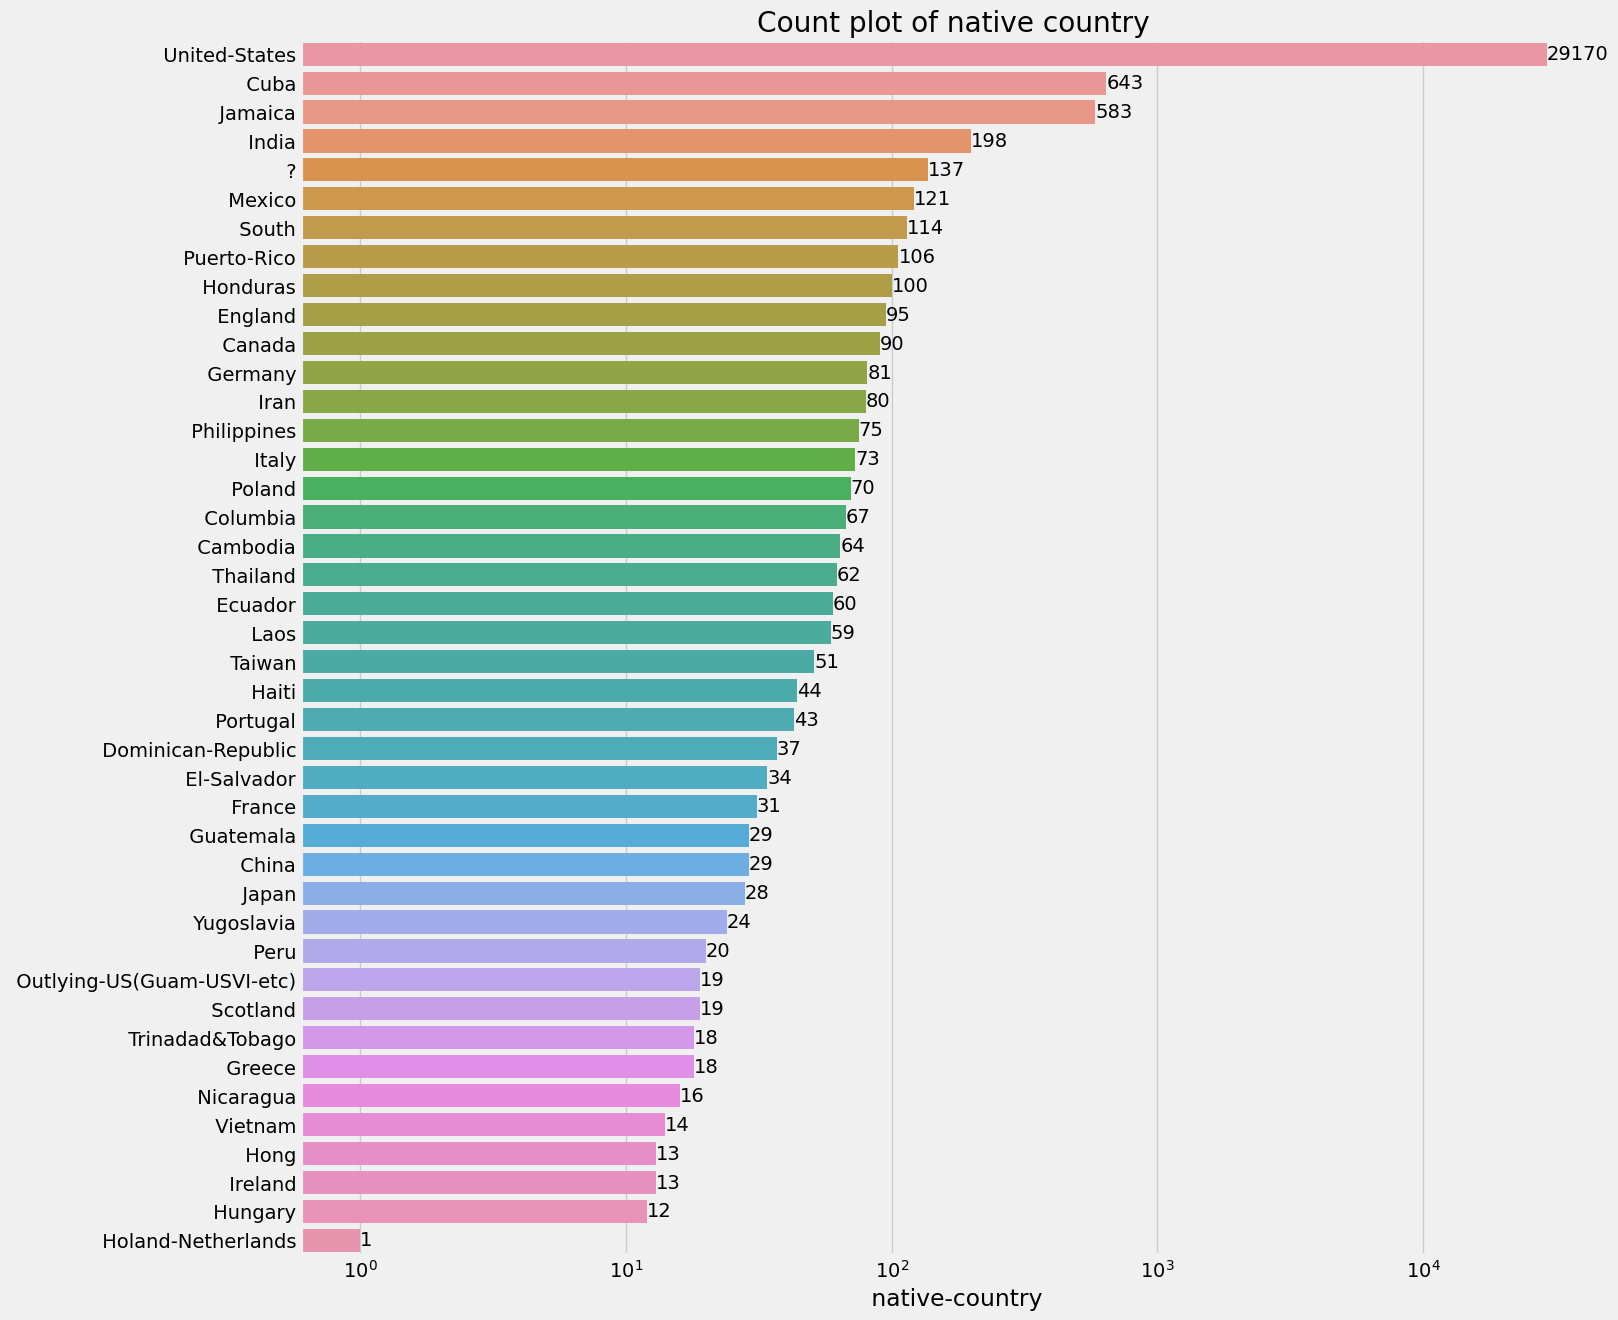

In [50]:
plt.figure(1 , figsize = (15 , 15))
g = sns.barplot(x=df[' native-country'].value_counts(), y=df[' native-country'].unique())
g.set_xscale('log')
g.bar_label(g.containers[0])
plt.title('Count plot of native country')
plt.show()

## Pengkodean Data

In [51]:
encoder = ce.BinaryEncoder()

In [52]:
new_df = ce.BinaryEncoder().fit_transform(df)
new_df.head()

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,sex_1,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,39,0,0,0,1,77516,0,0,0,0,...,1,2174,0,40,0,0,0,0,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,1,0,0,13,0,0,0,0,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,1,0,0,40,0,0,0,0,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,1,0,0,40,0,0,0,0,0,1
4,28,0,0,1,1,338409,0,0,0,0,...,0,0,0,40,0,0,0,0,1,0
